# Movielens movies analysis and recommedation

- This project is made by fatimah alabbad   
- email: fatimah.alabbad9@gmail.com  
- for udacity project data science blog post  

# Business understanding: 
**DESCRIPTION**  
find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

  1- User Age Distribution  
  2- User rating of the movie “Toy Story”  
  3- Top 10 movies by viewership rating  
  4- Find the ratings for all the movies reviewed by for a particular user of user id = 2696  
- Feature Engineering:  
    Use column genres:  

 1- Find out all the unique genres.   
 2- Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.   
 3- Determine the features affecting the ratings of any particular movie.  
 4- Develop an appropriate model to predict the movie ratings



In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data understanding:

## Import The Datasets:

### Movies Dataset:


In [2]:
movies =pd.read_csv('./datasets//movies.dat',engine='python', sep='::',
                    names=['MovieID', 'Title','Genres'])

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(3883, 3)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Genres     3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


### Ratings Dataset:

In [6]:
ratings =pd.read_csv('./datasets/ratings.dat',engine='python', sep='::', 
                     names=['UserID','MovieID','Rating','Timestamp'])


In [7]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [162]:
ratings.shape

(1000209, 4)

In [163]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [8]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


### Users Dataset:

In [9]:
users =pd.read_csv('./datasets/users.dat',engine='python', sep='::',
                   names=['UserID','Gender','Age','Occupation','Zip-code'])


In [10]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [11]:
users.shape

(6040, 5)

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
UserID        6040 non-null int64
Gender        6040 non-null object
Age           6040 non-null int64
Occupation    6040 non-null int64
Zip-code      6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB


In [13]:
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


## Data preparation:

## New Dataset (Master_Data):


Creat new dataset from the 3 datasets above with the following columns:   
- MovieID.
- Title.  
- UserID.    
- Age.    
- Gender.    
- Occupation.   
- Rating. 

In [168]:
# merge movies and ratings dataframes with movie id as primary key
df = pd.merge(movies,ratings,on='MovieID')
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [169]:
# merge the new dataframe with users dataframe with user id as primary key
master_data = pd.merge(df, users,on='UserID')
master_data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [170]:
# drop genres, Timestamp, Zip-code from the new dataframe
master_data.drop(['Genres','Timestamp','Zip-code'],axis=1,inplace=True)

In [171]:
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


In [172]:
master_data.shape

(1000209, 7)

In [173]:

master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 7 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
UserID        1000209 non-null int64
Rating        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
dtypes: int64(5), object(2)
memory usage: 61.0+ MB


In [174]:
# basic stat overview
master_data.describe(include='all')

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
count,1.000209e+06,1000209,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06
unique,NaN,3706,NaN,NaN,2,NaN,NaN
top,NaN,American Beauty (1999),NaN,NaN,M,NaN,NaN
freq,NaN,3428,NaN,NaN,753769,NaN,NaN
mean,1.865540e+03,NaN,3.024512e+03,3.581564e+00,NaN,2.973831e+01,8.036138e+00
std,1.096041e+03,NaN,1.728413e+03,1.117102e+00,NaN,1.175198e+01,6.531336e+00
min,1.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,1.030000e+03,NaN,1.506000e+03,3.000000e+00,NaN,2.500000e+01,2.000000e+00
50%,1.835000e+03,NaN,3.070000e+03,4.000000e+00,NaN,2.500000e+01,7.000000e+00
75%,2.770000e+03,NaN,4.476000e+03,4.000000e+00,NaN,3.500000e+01,1.400000e+01


In [175]:
# check for NaNs
master_data.isnull().sum()

MovieID       0
Title         0
UserID        0
Rating        0
Gender        0
Age           0
Occupation    0
dtype: int64

In [176]:
# check for duplication
master_data.duplicated().sum()

0

#### Users age Distribution

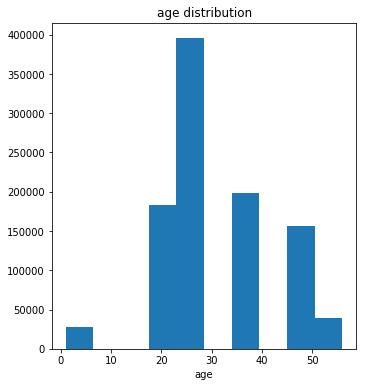

In [177]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(master_data['Age'], bins=10)
plt.title('age distribution')
plt.xlabel('age');


outtakes from the plot:
- the age distribution for the users who rated the movies is mostly people in their 20s and 30s.
- younger users don't rate movies a lot.

In [178]:
master_data['Age'].unique()

array([ 1, 50, 25, 35, 18, 45, 56])

### Users Gender Distribution

In [179]:
male_perc = round(np.sum(master_data['Gender'] == "M") / len(master_data['Gender']) *100)
female_perc = round(np.sum(master_data['Gender'] == "F") / len(master_data['Gender']) *100)
r = master_data.Rating

In [180]:
# sns.catplot(x='Gender', y='Rating', data=master_data, estimator=lambda x: sum(x=="M")*100.0/len(x));

### User rating of the movie “Toy Story”

In [181]:
toy_story_ratings = master_data[master_data['Title'] == 'Toy Story (1995)']
toy_story_grouped = toy_story_ratings.groupby('Rating')


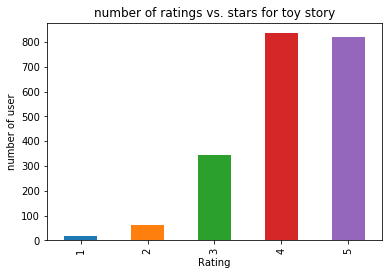

In [182]:
# plot of number of ratings for how many stars the movie toy story got
toy_story_grouped.size().plot.bar()
plt.title('number of ratings vs. stars for toy story')
plt.ylabel('number of user');

outtakes from the plot:

- a lot of users rated the movie Toy Story 4 and 5.     

### Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [183]:
one_user_movies = master_data[master_data['UserID'] == 2696]
one_user_movies

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
991035,350,"Client, The (1994)",2696,3,M,25,7
991036,800,Lone Star (1996),2696,5,M,25,7
991037,1092,Basic Instinct (1992),2696,4,M,25,7
991038,1097,E.T. the Extra-Terrestrial (1982),2696,3,M,25,7
991039,1258,"Shining, The (1980)",2696,4,M,25,7
991040,1270,Back to the Future (1985),2696,2,M,25,7
991041,1589,Cop Land (1997),2696,3,M,25,7
991042,1617,L.A. Confidential (1997),2696,4,M,25,7
991043,1625,"Game, The (1997)",2696,4,M,25,7
991044,1644,I Know What You Did Last Summer (1997),2696,2,M,25,7


In [184]:
one_user_movies.shape

(20, 7)

#### investigation on user with ID = 2696:
the user with ID = 2696 is a male between the age 25-34 with Occupation in executive/managerial has rated 20 movies. His favorite movie is Lone Star (1996).

Note: I will use this user after i made my recommendation model to predict other movies for him.

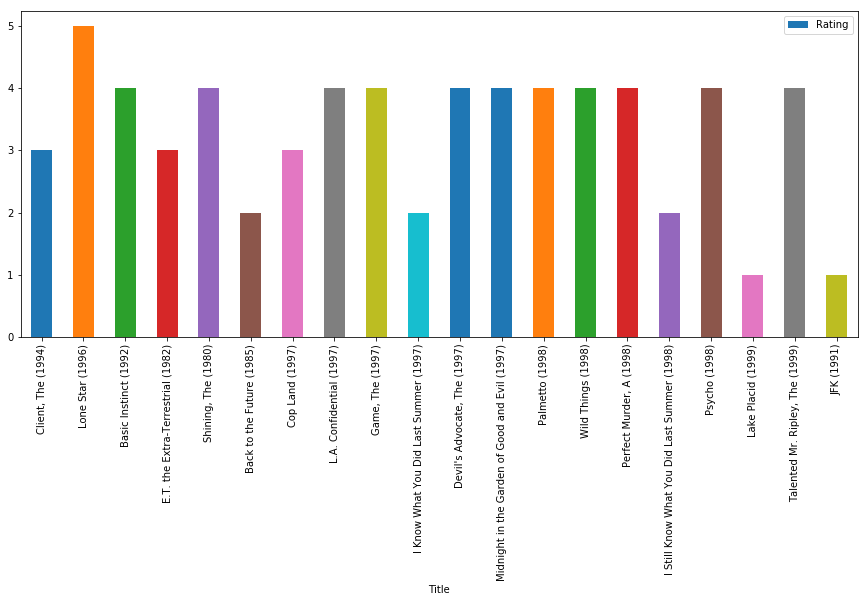

In [185]:
one_user_movies.plot.bar(x='Title',y='Rating',figsize=(15,6));

### new movies  ratings dataframe

make new dataframe for the average ratings and number of rating for each movie


In [186]:
# make new dataframe for the average ratings 
ratings_df = pd.DataFrame(master_data.groupby(['MovieID','Title'])['Rating'].mean())
ratings_df.head()

,,Rating
MovieID,Title,
1,Toy Story (1995),4.146846
2,Jumanji (1995),3.201141
3,Grumpier Old Men (1995),3.016736
4,Waiting to Exhale (1995),2.729412
5,Father of the Bride Part II (1995),3.006757


In [187]:
# add new column for the number of ratings
ratings_df['number_of_ratings'] = master_data.groupby(['MovieID','Title'])['Rating'].count()
ratings_df.head()

,,Rating,number_of_ratings
MovieID,Title,,
1,Toy Story (1995),4.146846,2077
2,Jumanji (1995),3.201141,701
3,Grumpier Old Men (1995),3.016736,478
4,Waiting to Exhale (1995),2.729412,170
5,Father of the Bride Part II (1995),3.006757,296


In [188]:
ratings_df.shape

(3706, 2)

NOTES:

- if the number of ratings is low then the average rating will not be accurate.
- we need to make a threshold for how many rating is considered valid so our recommendation model is more accurate. 

In [189]:
# reset the index so we can plot the title of the movies 
ratings_df.reset_index(inplace=True)

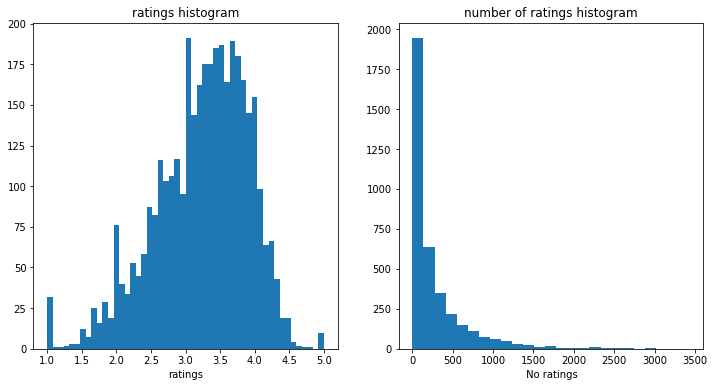

In [190]:
# histogram plot for the average ratings
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(ratings_df['Rating'], bins=50)
plt.title('ratings histogram')
plt.xlabel('ratings')

# histogram plot for the number of ratings
plt.subplot(122)
plt.hist(ratings_df['number_of_ratings'], bins=25)
plt.title('number of ratings histogram')
plt.xlabel(' No ratings');


Outtakes from the plot:

- majority of the ratings is between 3 and 4.
- a lot of users did not rate the movies, some of the ratings came from few people.

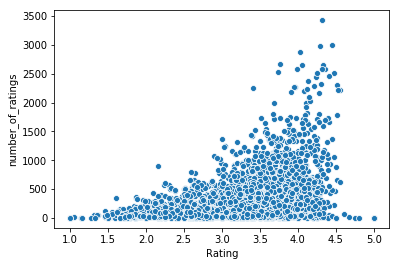

In [191]:
# making a plot to check if majority of rating is for popular movies 
sns.scatterplot(x='Rating', y='number_of_ratings', data=ratings_df);

so the scater plot confirms that the more ratings the movie has ,the more popular it is.

### Top 10 movies by viewership rating

In [192]:
top_25_movies = ratings_df.sort_values('number_of_ratings',ascending=False)[:10]
top_25_movies

,MovieID,Title,Rating,number_of_ratings
2651,2858,American Beauty (1999),4.317386,3428
253,260,Star Wars: Episode IV - A New Hope (1977),4.453694,2991
1106,1196,Star Wars: Episode V - The Empire Strikes Back...,4.292977,2990
1120,1210,Star Wars: Episode VI - Return of the Jedi (1983),4.022893,2883
466,480,Jurassic Park (1993),3.763847,2672
1848,2028,Saving Private Ryan (1998),4.337354,2653
575,589,Terminator 2: Judgment Day (1991),4.058513,2649
2374,2571,"Matrix, The (1999)",4.315830,2590
1178,1270,Back to the Future (1985),3.990321,2583
579,593,"Silence of the Lambs, The (1991)",4.351823,2578


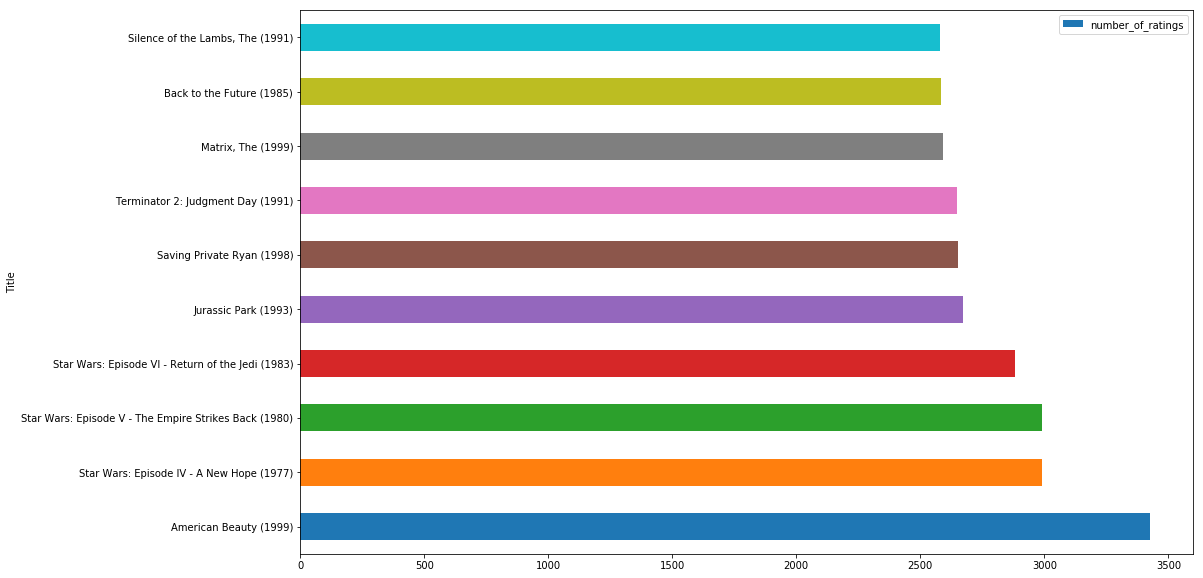

In [193]:
# plot of the top 10 viewed movies
top_25_movies.plot.barh(x='Title',y='number_of_ratings',figsize=(16,10));

the top viewed movie is American Beauty with almost 3500 ratings 

## recommendation function without machine learning

First I will make a recommendation function without machine learning with only rating of the movies. then I will make a model with machine learning to give me recommendation with more features and I will compare them.

### pivot table dataframe:

pivot table with userid as index, movies title as columns and ratings as values

In [194]:
movies_pivot = master_data.pivot_table(index='UserID',
                                columns='Title',
                                values= 'Rating')
movies_pivot

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the dataframe have a lot of NaNs values because some users did not rate the movies. 

In [195]:
movies_pivot.shape

(6040, 3706)

Making a function to recommed movies based on similar ratings

In [15]:
def recommendation_with_corr(movie, df=movies_pivot):
    '''
    Arguments:
    movie: name of movie as string
    df: name of the dataframe that the movie is in
    
    - you only need to write the name of movie as string
    
    '''
    ratings = df[movie]
    similar= df.corrwith(ratings)
    corr = pd.DataFrame(similar,columns=['correlation'])
    # drop the null values because not all user rated the same movie so it will show as null value 
    corr.dropna(inplace=True)
    sorted_corr = corr.sort_values(['correlation'],ascending=False)[:5]
    return sorted_corr

NameError: name 'movies_pivot' is not defined

### recommendation for user with ID =2696 based on his favorite " Lone Star ":


In [197]:
# top 5 movies similar to Lone Star
recommendation_with_corr('Lone Star (1996)')

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
Title,
Heaven (1998),1.0
Rosie (1998),1.0
Dadetown (1995),1.0
"Great Locomotive Chase, The (1956)",1.0
"Amityville Curse, The (1990)",1.0


## Feature engineering 

now will start the machine learning model, but first I need to do some feature engineering 
for some feature so I can use them in my model.

### Hote encoding

- X_features:  
    - 'Gender'
    - 'Age'  
    - 'Occupation'   
    - 'Genres'    
- y_target: 'Rating'

- need to change gender to (male:1, female:0).  
- will add the Genres column and make a dummies for all the Genres that we have in the dataframe.
- make new target based on movies rating and number of ratings

In [198]:
master_data.columns 

Index(['MovieID', 'Title', 'UserID', 'Rating', 'Gender', 'Age', 'Occupation'], dtype='object')

In [199]:
movies['Genres'].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: Genres, dtype: object

In [200]:
# making dummies from the Genres column
movies_genres = movies['Genres'].str.get_dummies('|').add_prefix('gen_')
movies_genres.head()

,gen_Action,gen_Adventure,gen_Animation,gen_Children's,gen_Comedy,gen_Crime,gen_Documentary,gen_Drama,gen_Fantasy,gen_Film-Noir,gen_Horror,gen_Musical,gen_Mystery,gen_Romance,gen_Sci-Fi,gen_Thriller,gen_War,gen_Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [201]:
movies_genres.sum()

gen_Action          503
gen_Adventure       283
gen_Animation       105
gen_Children's      251
gen_Comedy         1200
gen_Crime           211
gen_Documentary     127
gen_Drama          1603
gen_Fantasy          68
gen_Film-Noir        44
gen_Horror          343
gen_Musical         114
gen_Mystery         106
gen_Romance         471
gen_Sci-Fi          276
gen_Thriller        492
gen_War             143
gen_Western          68
dtype: int64

In [202]:
movies_genres.shape

(3883, 18)

In [203]:
# rejoining the genres columns with movies dataframe 
# rrejoining again so we can use the movie id as primary key when merging with master_data dataframe 
new_movie_with_dummies = pd.concat([movies,movies_genres],sort=False, axis=1)

In [204]:
new_movie_with_dummies.head()

,MovieID,Title,Genres,gen_Action,gen_Adventure,gen_Animation,gen_Children's,gen_Comedy,gen_Crime,gen_Documentary,...,gen_Fantasy,gen_Film-Noir,gen_Horror,gen_Musical,gen_Mystery,gen_Romance,gen_Sci-Fi,gen_Thriller,gen_War,gen_Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
new_movie_with_dummies.shape

(3883, 21)

In [206]:
# making dummies from the gender column
print(master_data['Gender'].unique())
master_data['Gender'] = master_data['Gender'].map({'F':0,'M':1})
master_data.head()

['F' 'M']


,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,0,1,10
1,48,Pocahontas (1995),1,5,0,1,10
2,150,Apollo 13 (1995),1,5,0,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,0,1,10
4,527,Schindler's List (1993),1,5,0,1,10


### Feature Engineering our Target:

In [207]:
# will use this dataframe as our target 
ratings_df.head()

,MovieID,Title,Rating,number_of_ratings
0,1,Toy Story (1995),4.146846,2077
1,2,Jumanji (1995),3.201141,701
2,3,Grumpier Old Men (1995),3.016736,478
3,4,Waiting to Exhale (1995),2.729412,170
4,5,Father of the Bride Part II (1995),3.006757,296


- I need to set a criteria for the number of ratings so if the number of ratings is low we will not consider it.
- I am going to make new column (weighted average rating) based on IMDB ratings  

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:  
R = average for the movie (mean) = (Rating)  
v = number of votes for the movie = (votes)  
m = minimum votes required to be listed   
C = the mean vote across the whole report   

refrence:
https://www.quora.com/How-does-IMDbs-rating-system-work

In [208]:
def weighted_rating(r=ratings_df['Rating'],m_votes = 20, v= ratings_df['number_of_ratings']):
    '''
    weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:
    r = average for the movie (mean) = (Rating)
    v = number of votes for the movie = (votes)
    m_votes = minimum votes required to be listed
    C = the mean vote across the whole report
    
    '''
    if v.size >= m_votes:
        c= r.mean() 
        wr = round(( v / (v + m_votes) * r + (m_votes / (v + m_votes)) * c))
        return wr

In [209]:
# make new column for the weighted_rating
ratings_df['weighted_rating'] = weighted_rating()

In [210]:
ratings_df.head()

,MovieID,Title,Rating,number_of_ratings,weighted_rating
0,1,Toy Story (1995),4.146846,2077,4.0
1,2,Jumanji (1995),3.201141,701,3.0
2,3,Grumpier Old Men (1995),3.016736,478,3.0
3,4,Waiting to Exhale (1995),2.729412,170,3.0
4,5,Father of the Bride Part II (1995),3.006757,296,3.0


In [211]:
print('features shape:{} \ntarget shape:{}'.format(new_movie_with_dummies.shape, ratings_df.shape))

features shape:(3883, 21) 
target shape:(3706, 5)


The shape is inconsistent between our features and the target we need to do some cleaning

In [212]:
# combaring movieID in our featurs and target then remove movies that are not in both 
movies_df = pd.merge(new_movie_with_dummies,ratings_df,on='MovieID')

In [213]:
movies_df.shape

(3706, 25)

In [214]:
movies_df.head()

,MovieID,Title_x,Genres,gen_Action,gen_Adventure,gen_Animation,gen_Children's,gen_Comedy,gen_Crime,gen_Documentary,...,gen_Mystery,gen_Romance,gen_Sci-Fi,gen_Thriller,gen_War,gen_Western,Title_y,Rating,number_of_ratings,weighted_rating
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,Toy Story (1995),4.146846,2077,4.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,0,0,0,0,0,0,Jumanji (1995),3.201141,701,3.0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,1,0,0,0,0,Grumpier Old Men (1995),3.016736,478,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,Waiting to Exhale (1995),2.729412,170,3.0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,Father of the Bride Part II (1995),3.006757,296,3.0


In [215]:
# merging genres and weighted rating columns with master dataframe so we can use it 
final_df = pd.merge(master_data,movies_df,on='MovieID')

In [216]:
final_df.head()

,MovieID,Title,UserID,Rating_x,Gender,Age,Occupation,Title_x,Genres,gen_Action,...,gen_Mystery,gen_Romance,gen_Sci-Fi,gen_Thriller,gen_War,gen_Western,Title_y,Rating_y,number_of_ratings,weighted_rating
0,1,Toy Story (1995),1,5,0,1,10,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,Toy Story (1995),4.146846,2077,4.0
1,1,Toy Story (1995),6,4,0,50,9,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,Toy Story (1995),4.146846,2077,4.0
2,1,Toy Story (1995),8,4,1,25,12,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,Toy Story (1995),4.146846,2077,4.0
3,1,Toy Story (1995),9,5,1,25,17,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,Toy Story (1995),4.146846,2077,4.0
4,1,Toy Story (1995),10,5,0,35,1,Toy Story (1995),Animation|Children's|Comedy,0,...,0,0,0,0,0,0,Toy Story (1995),4.146846,2077,4.0


In [217]:
final_df.shape

(1000209, 31)

In [218]:
# drop unnecessary columns
final_df.drop(['Title_x','Title_y','Genres','Rating_x'],axis=1,inplace=True)

now we can choose our features and target for the model.

# Data modeling:

## Logistic regression 

In [219]:
x_features = final_df.loc[:,'Gender':'gen_Western'] # will use Gender, Age, Occupation and Genres as our features
y_target = final_df['weighted_rating'] # wighted ratings as our target

In [220]:
print(x_features.shape,y_target.shape ) # they have equal rows

(1000209, 21) (1000209,)


the count for every ratings:
 4.0    591602
3.0    367663
2.0     34083
5.0      6861
Name: weighted_rating, dtype: int64


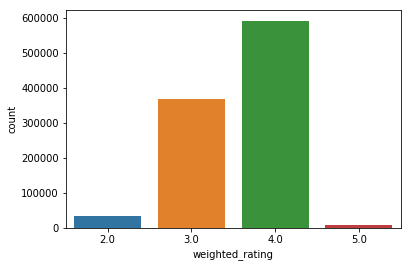

In [221]:
# plot the distrebution for the ratings to see if uur classes are imbalanced 
print('the count for every ratings:\n', y_target.value_counts())
sns.countplot(x= y_target);

- the ratings are imbalanced we need to fix this and make them balanced
- we need to fix so our model would not be biased 

In [222]:
# import model libraries
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


## Oversampling with SMOTE

In [223]:
# oversample the minore classes like 2 and 5
os = SMOTE(random_state=0)

# split the data to test and train 
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state=0)

columns = X_train.columns
# fit the data on SMOTE model 
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
# make new two dataframes for X and y
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.Series(data=os_data_y)

In [224]:
print(os_data_X.shape, os_data_y.shape)

(1657052, 21) (1657052,)


In [225]:
os_data_y.value_counts()

5.0    414263
4.0    414263
3.0    414263
2.0    414263
dtype: int64

In [226]:
# our new features and target after resampling
X = os_data_X
y = os_data_y

## Logistic Regression Model 

In [227]:
# split the data to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initiate model 
logreg = LogisticRegression(solver='liblinear', multi_class='auto')

# fit model 
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)
score = logreg.score(X_test, y_test)
print('the acuracy score on test set', score)
print(y_pred([:10]), y_test([:10]).values())

the accuracy score is good but we can enhance the acuracy of the model with Gridsearch

## Confusion Matrix

In [229]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 88577  21527  10450   3961]
 [ 42047  42878  25133  13926]
 [ 23427  30592  46448  23807]
 [   191      0      0 124152]]


their is some misclassified values

## Model evaluation

In [230]:
# Model evaluation metrics for regression  
print('y-intercept : ', logreg.intercept_)  
print('beta coefficients : ', logreg.coef_)  
print('Mean Abs Error MAE : ', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Sq Error MSE : ', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('r2 value : ', metrics.r2_score(y_test, y_pred))

y-intercept :  [ 0.5953042  -1.55729352 -2.25278514 -0.88630385]
beta coefficients :  [[ 6.66639778e-02 -1.63536474e-02 -2.57373717e-03  2.55149671e-01
  -1.50411237e-01 -3.23306510e+00  1.37109844e+00 -7.50836544e-01
  -1.56548163e+00 -3.50218508e+00 -2.82848330e+00 -1.31545931e+00
  -3.22642465e+00  6.80305548e-01 -4.29571195e-01 -1.52235098e-01
  -8.60186626e-01  4.44912568e-02 -1.31623225e+00 -3.95981472e-01
  -4.06334907e-01]
 [-1.72785860e-02 -1.91589490e-03  6.86787977e-04  2.26742461e-01
   3.99057822e-01  6.92282527e-01 -3.98541261e-01  1.00404732e+00
  -1.24180045e+00  4.26730000e-01 -9.02631657e-02  8.44039082e-01
  -1.27251350e+00  3.31702103e-01 -2.45707830e-01  7.64213546e-01
   6.78267680e-01  2.05827685e-01  7.40309088e-01 -4.91162750e-01
   2.61204518e-02]
 [-6.09838337e-03  1.36040922e-02  1.35718847e-03 -4.65797666e-01
   4.11801205e-01  2.38571143e+00 -1.03723290e+00  7.72710353e-01
  -1.03106064e+00  2.74370716e+00  9.15723988e-01  5.15044033e-01
   3.82994333e+00 

## Hyperparameter Tuning Using Grid Search

In [231]:
# defining hyperparameters
param = {'penalty':['l1', 'l2'],
        'C':np.logspace(0, 4, 10),
        }

In [232]:
# Create grid search
clf = GridSearchCV(logreg, param, cv=5, verbose=0)

# fit grid search
best_model = clf.fit(X_train, y_train)


In [233]:
print("Tuned Logistic Regression Parameters: {}".format(best_model.best_params_)) 
print("Best score is {}".format(best_model.best_score_))

Tuned Logistic Regression Parameters: {'C': 1291.5496650148827, 'penalty': 'l1'}
Best score is 0.6078645718384462


In [234]:
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print('the acuracy score on test set', score)
print(y_pred[:10], y_test[:10])

the acuracy score on test set 0.6076086869060743
[5. 3. 2. 5. 2. 5. 3. 5. 3. 5.] 187620     4.0
5318       4.0
717819     2.0
1248688    5.0
1045818    2.0
1147552    3.0
54125      3.0
1435739    5.0
718207     2.0
1349667    5.0
dtype: float64


## Knn model

In [235]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
print(knn_score)
# print(knn.predict(y_test))

# Results evaluation: 

The last part is using supervised machine learning model to make the predictions and from the features that we had, it predicted the weighted ratings for the movie really good.**score above 0.6**